In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from string import printable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
from patsy import dmatrices
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [120]:
df= pd.read_csv('/Users/carlosruiz/Desktop/Animal-Shelter-Project/Data/shelter_breed.csv')

In [121]:
df

,Unnamed: 0,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
0,0,0,12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.74370,Austin,Dachshund Mix,0,1,NaN,32.0,9.0,15.0
1,1,1,14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.000000,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.000000,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair,0,0,NaN,6.0,8.0,16.0
2,2,2,22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.000000,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.000000,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.74370,Austin,Labrador Retriever,1,1,Beagle,57.5,19.5,14.5
3,3,3,32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.000000,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.000000,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.74370,Austin,German Shepherd Mix,0,1,NaN,90.0,26.0,13.0
4,4,4,48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.000000,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.000000,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Pointer Mix,0,1,NaN,75.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,20576,33249,79647,7 years,A769012,2011-03-29 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2018-04-01 12:36:00,4,2018,2018-04,Sunday,12,1.0,2011,3,2018-04,7 years,A769012,Dog,Chihuahua Shorthair Mix,Tan,Springdale And Govalle in Austin (TX),Normal,Stray,Spayed Female,1,2555,7.000000,"(5.0, 7.5]",2018-03-28 17:48:00,3,2018,2018-03,Wednesday,17,1.0,3 days 18:48:00.000000000,3.783333,Tan,0,NaN,1,0,1,Austin,30.271129,-97.

In [122]:
df.drop(['Unnamed: 0','level_0','index'],axis=1,inplace=True)

In [123]:
df=df[(df['animal_type']== 'Dog')]
df=df[df.outcome_type=='Adoption']

In [124]:
df=df[df.time_in_shelter_days<300]
df

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
0,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.74370,Austin,Dachshund Mix,0,1,NaN,32.0,9.0,15.0
1,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.000000,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.000000,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair,0,0,NaN,6.0,8.0,16.0
2,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.000000,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.000000,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.74370,Austin,Labrador Retriever,1,1,Beagle,57.5,19.5,14.5
3,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.000000,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.000000,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.74370,Austin,German Shepherd Mix,0,1,NaN,90.0,26.0,13.0
4,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.000000,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.000000,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Pointer Mix,0,1,NaN,75.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,7 years,A769012,2011-03-29 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2018-04-01 12:36:00,4,2018,2018-04,Sunday,12,1.0,2011,3,2018-04,7 years,A769012,Dog,Chihuahua Shorthair Mix,Tan,Springdale And Govalle in Austin (TX),Normal,Stray,Spayed Female,1,2555,7.000000,"(5.0, 7.5]",2018-03-28 17:48:00,3,2018,2018-03,Wednesday,17,1.0,3 days 18:48:00.000000000,3.783333,Tan,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair Mix,0,1,NaN,6.0,8.0,16.0
20577,2 months,A769014,2018-01-2

In [125]:
df.date_of_birth=df.date_of_birth.apply(lambda x: x[:10])

In [126]:
df['outcome_datetime']=pd.to_datetime(df['outcome_datetime'])
df['intake_datetime']=pd.to_datetime(df['intake_datetime'])

In [127]:
df['time_in_shelter'] = df['outcome_datetime'] - df['intake_datetime']

In [128]:
df['outcome_month']=df.outcome_datetime.apply(lambda x: str(x)[5:7])
df['outcome_year']=df.outcome_datetime.apply(lambda x: str(x)[:4])
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [129]:
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [130]:
df['intake_month']=df.intake_datetime.apply(lambda x: int(str(x)[5:7]))
df['intake_year']=df.intake_datetime.apply(lambda x: int(str(x)[:4]))
df['animal_id_intake']=df.animal_id_intake.apply(lambda x: int(x[1:]))
df['intake_weekday']=df.intake_datetime.dt.dayofweek

In [131]:
dt=df.intake_month.value_counts()
fig=px.bar(dt, title="Amount of intakes per month",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#a8e6cf'])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#8c9da9',
    xaxis_tickvals=[1,2,3,4,5,6,7,8,9,10,11,12],
    xaxis_ticktext=['January',"February",'March','April','May',"June",'July','August','September',"October",'November','December'],
    )
fig.show()

In [132]:
condition=[
    df['intake_condition'] == 'Aged',
    df['intake_condition'] == 'Ferral',
    df['intake_condition'] == 'Injured',
    df['intake_condition'] == 'Normal',
    df['intake_condition'] == 'Nursing',
    df['intake_condition'] == 'Other',
    df['intake_condition'] == 'Pregnant',
    df['intake_condition'] == 'Sick'
]
choises=[
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    0
]
df['health']=np.select(condition,choises)

In [133]:
def unique_breed_dic (dictionary,column):
    df=dictionary.copy()
    df.reset_index(drop=True,inplace=True)
    
    list_of_breeds=[]
    for i in range(len(df[column])):
        if df[column][i].find('/')==-1:
            list_of_breeds.append([df[column][i]])
        else:
            list_of_breeds.append(df[column][i].split('/'))
        
    list_of_breeds=[val for sublist in list_of_breeds for val in sublist]
    
    dup_list=[]
    uniqe_list=[]


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))
    final_dic={}
    for company in unique_list:
        final_dic[company]=0

    for company in dup_list:
        final_dic[company]=final_dic[company]+1
    return final_dic

In [134]:
brown=['Brown Brindle','Red','Liver','Brown','Tan','Ruddy','Chocolate','Brown Tiger','Sable']
spotted=["Yellow Brindle",'Blue Merle','Black Tiger','Red Merle', 'Liver Tick','Agouti','Blue Tick','Black Brindle','Fawn','Brown Merle','Red Tick']
mustard=['Buff','Orange','Apricot']
other=['Tricolor','Pink','Blue']
white=['Silver','Cream','White']
black=['Black','Black Smoke','Gray','Blue Tiger']
gold=['Gold','Yellow', 'Blue Cream',]

In [135]:
def color_bin (dfcol):
    for i in range(len(brown)):
        if dfcol[0]== brown[i]:
            return 1

    for i in range(len(spotted)):
        if dfcol[0]== spotted[i]:
            return 2

    for i in range(len(mustard)):
        if dfcol[0]== mustard[i]:
            return 3

    for i in range(len(other)):
        if dfcol[0]== other[i]:
            return 4

    for i in range(len(white)):
        if dfcol[0]== white[i]:
            return 5

    for i in range(len(black)):
        if dfcol[0]== black[i]:
            return 6

    for i in range(len(gold)):
        if dfcol[0]== gold[i]:
            return 7

In [136]:
conditions=[
    (df.intake_type=='Owner Surrender')|(df.intake_type=='Euthanasia Request')
]
choises=[
    1
]

df['was_owned']=np.select(conditions,choises,default=0)

In [138]:
df['color_bin']=df.color.map(lambda x: color_bin(x))

In [139]:
%%time
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date.date() in seasons['Spring']:
        return 1
    if date.date() in seasons['Summer']:
        return 2
    if date.date() in seasons['Fall']:
        return 3
    else:
        return 4
df['season'] = df.intake_datetime.map(season_of_date)

CPU times: user 24.9 s, sys: 301 ms, total: 25.2 s
Wall time: 25 s


In [140]:
df['time_in_shelter']=df.time_in_shelter.apply(lambda x: int(str(x)[:2]))
df['intake_datetime']=df.intake_datetime.apply(lambda x: str(str(x)[:10]))
df['age_upon_intake']=df.age_upon_intake.apply(lambda x: int(x[:2]))
df['age_upon_intake_age_group']=df.age_upon_intake_age_group.apply(lambda x: list(map(float,x.strip('(]').split(','))))
df['color']=df.color.apply(lambda x: x.strip('/').split('/'))
df.age_upon_intake_age_group=df.age_upon_intake_age_group.apply(lambda x: int(sum(x)/2))
df.reset_index(drop=True,inplace=True)

In [142]:
#df=pd.get_dummies(df, columns=['intake_month'])

In [143]:
data=df.intake_weekday.value_counts()
fig=px.bar(data, title="Amount of intakes per Weekday",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#FF847C'])
fig.update_layout(
    xaxis_tickfont_size=14,
    xaxis_tickmode='array',
    xaxis_tickvals=[0,1,2,3,4,5,6],
    xaxis_ticktext=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    showlegend=False,
    plot_bgcolor = '#6C5B7B',
    )

fig.show()

In [144]:
data=df.outcome_weekday.value_counts()
fig=px.bar(data, title="Amount of adoptions per Weekday",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['lightblue'])
fig.update_layout(
    xaxis_tickfont_size=14,
    xaxis_tickmode='array',
    xaxis_tickvals=[0,1,2,3,4,5,6],
    xaxis_ticktext=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    showlegend=False,
    plot_bgcolor = '#6C5B7B'
    )

fig.show()

In [145]:
data=df.season.value_counts()
fig=px.bar(data, title="Amount of intakes per Season",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#b9A9a9'])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#F9CDAD',
    xaxis_tickvals=[1,2,3,4],
    xaxis_ticktext=['Spring',"Summer",'Fall','Winter'],
    )

fig.show()

In [146]:
data=df.intake_type.value_counts()
fig=px.bar(data, title="Reason for intake",labels={'index': 'Reasons','value':'Amounts'},color_discrete_sequence=['#dec3c3 '])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#4d648d',
    )

fig.show()

In [147]:
# features=[   'dob_year', 'dob_month',
#        'age_upon_intake', 'animal_id_intake',
#        'count', 'age_upon_intake_days', 'age_upon_intake_tears',
#        'age_upon_intake_age_group', 'intake_year', 'intake_weekday', 'intake_hour', 'intake_number',
#        'time_in_shelter', 'time_in_shelter_days', 'has_second_color', 'is_dog', 'is_male', 'is_fixed', 'found_lat',
#        'found_lon', 'is_breed2', 'is_mix', 
#        'max_weight', 'max_height', 'max_life', 'health', 'color_bin',
#        'was_owned', 'season', 'intake_month_1', 'intake_month_2',
#        'intake_month_3', 'intake_month_4', 'intake_month_5', 'intake_month_6',
#        'intake_month_7', 'intake_month_8', 'intake_month_9', 'intake_month_10',
#        'intake_month_11', 'intake_month_12']

In [154]:
features=['dob_year', 'dob_month',
       'age_upon_intake', 'animal_id_intake',
       'count', 'age_upon_intake_days', 'age_upon_intake_tears',
       'age_upon_intake_age_group', 'intake_year', 'intake_weekday', 'intake_hour', 'intake_number',
       'time_in_shelter', 'time_in_shelter_days', 'has_second_color', 'is_dog', 'is_male', 'is_fixed', 'found_lat',
       'found_lon', 'is_breed2', 'is_mix', 
       'max_weight', 'max_height', 'max_life', 'health', 'color_bin',
       'was_owned', 'season', 'intake_month']

In [155]:
featurelist='+'.join(features)
featurelist

'dob_year+dob_month+age_upon_intake+animal_id_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+time_in_shelter+time_in_shelter_days+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month'

In [156]:
df[features].dtypes

dob_year                       int64
dob_month                      int64
age_upon_intake                int64
animal_id_intake               int64
count                          int64
age_upon_intake_days           int64
age_upon_intake_tears        float64
age_upon_intake_age_group      int64
intake_year                    int64
intake_weekday                 int64
intake_hour                    int64
intake_number                float64
time_in_shelter                int64
time_in_shelter_days         float64
has_second_color               int64
is_dog                         int64
is_male                        int64
is_fixed                       int64
found_lat                    float64
found_lon                    float64
is_breed2                      int64
is_mix                         int64
max_weight                   float64
max_height                   float64
max_life                     float64
health                         int64
color_bin                     object
w

In [157]:
df[features].corr()

,dob_year,dob_month,age_upon_intake,animal_id_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,has_second_color,is_dog,is_male,is_fixed,found_lat,found_lon,is_breed2,is_mix,max_weight,max_height,max_life,health,was_owned,season,intake_month
dob_year,1.000000,-0.087577,-0.437901,0.593848,NaN,-0.868105,-0.868105,-0.820347,0.469682,-0.010128,-0.010781,-0.032566,-0.124379,-0.177873,0.057978,NaN,-0.016541,-0.007942,-0.046791,-0.046203,-0.033838,0.097415,0.124672,0.130283,-0.103694,0.020955,-0.120987,-0.003581,-0.057909
dob_month,-0.087577,1.000000,-0.028128,0.012006,NaN,-0.026497,-0.026497,-0.022211,-0.097064,-0.004635,0.016835,0.006986,-0.008839,-0.015525,0.024687,NaN,-0.008152,0.007147,-0.007343,-0.007312,-0.003192,0.010722,0.012269,0.014146,0.000193,0.000918,-0.010213,0.050764,0.428505
age_upon_intake,-0.437901,-0.028128,1.000000,-0.152944,NaN,0.514173,0.514173,0.564663,0.003737,-0.002731,0.005868,-0.003936,-0.011329,0.031198,-0.020847,NaN,-0.009308,-0.013123,0.023178,0.023012,-0.011551,-0.056877,-0.030772,-0.023387,0.028239,-0.004294,0.105179,0.026688,0.010485
animal_id_intake,0.593848,0.012006,-0.152944,1.000000,NaN,-0.262284,-0.262284,-0.263608,0.717761,-0.001087,-0.025556,-0.024242,-0.093379,-0.123188,0.005519,NaN,0.004882,-0.042540,-0.021683,-0.021572,-0.115697,0.062213,0.039345,0.031266,-0.030412,0.007425,-0.068193,0.006129,-0.021236
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_upon_intake_days,-0.868105,-0.026497,0.514173,-0.262284,NaN,1.000000,1.000000,0.947687,0.007509,0.011554,-0.010211,0.019228,0.101166,0.161278,-0.060282,NaN,0.022509,-0.014473,0.047593,0.046889,-0.043255,-0.102756,-0.114205,-0.125801,0.097103,-0.014564,0.153936,0.008565,-0.003865
age_upon_intake_tears,-0.868105,-0.026497,0.514173,-0.262284,NaN,1.000000,1.000000,0.947687,0.007509,0.011554,-0.010211,0.019228,0.101166,0.161278,-0.060282,NaN,0.022509,-0.014473,0.047593,0.046889,-0.043255,-0.102756,-0.114205,-0.125801,0.097103,-0.014564,0.153936,0.008565,-0.003865
age_upon_intake_age_group,-0.820347,-0.022211,0.564663,-0.263608,NaN,0.947687,0.947687,1.000000,0.011429,0.006952,-0.012952,0.001412,0.081050,0.134220,-0.056237,NaN,0.007588,-0.025181,0.033067,0.032505,-0.034742,-0.091303,-0.095622,-0.105664,0.081317,-0.010414,0.149967,0.001105,-0.003138
intake_year,0.469682,-0.097064,0.003737,0.717761,NaN,0.007509,0.007509,0.011429,1.000000,0.002032,-0.040956,-0.026737,-0.073566,-0.068618,0.015411,NaN,0.005338,-0.032921,-0.013799,-0.013785,-0.137435,0.013279,0.063012,0.054445,-0.046338,0.020309,0.053542,0.041131,-0.252797
intake_weekday,-0.010128,-0.004635,-0.002731,-0.001087,NaN,0.011554,0.011554,0.006952,0.002032,1.000000,-0.046490,-0.007440,0.004770,0.009144,-0.001346,NaN,0.017040,0.004088,-0.016735,-0.016796,-0.018633,0.001849,0.006163,0.010949,-0.002845,0.010566,0.008313,0.012323,-0.017661


In [158]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

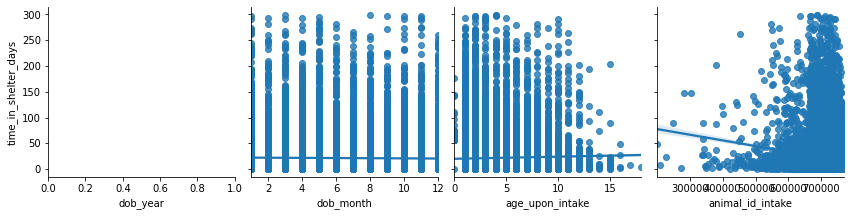

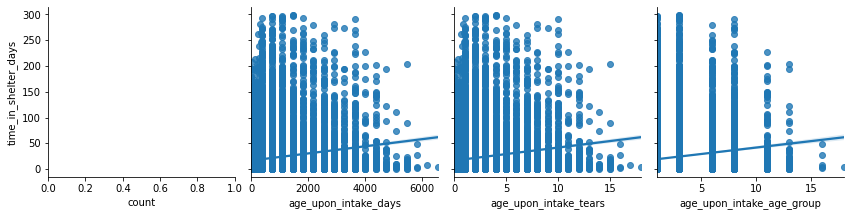

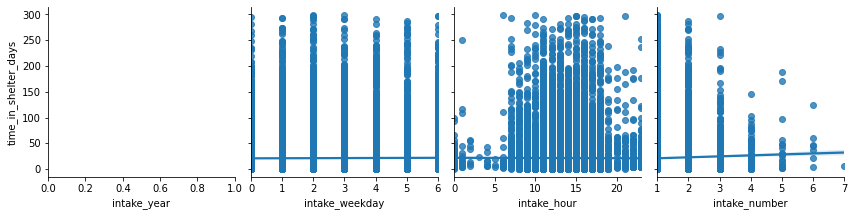

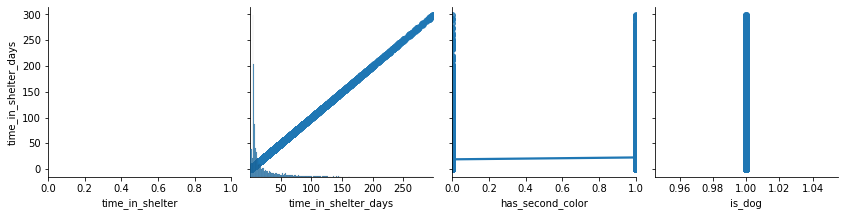

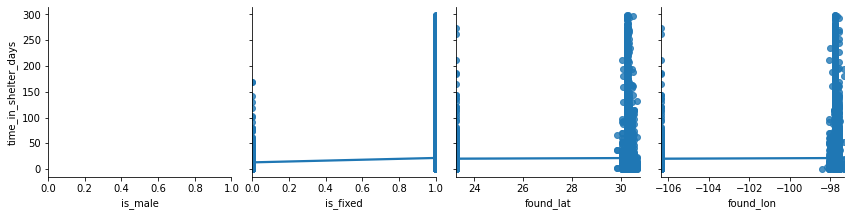

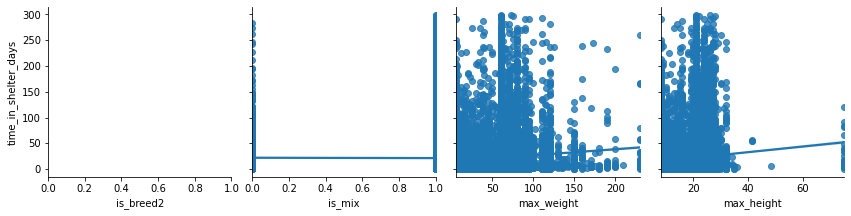

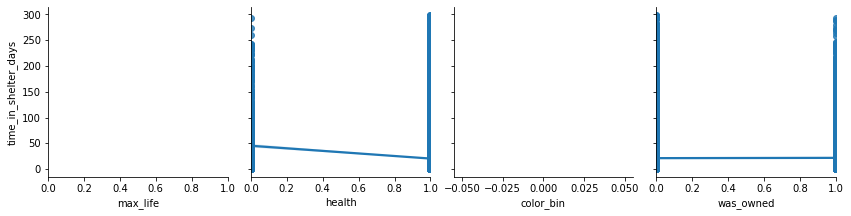

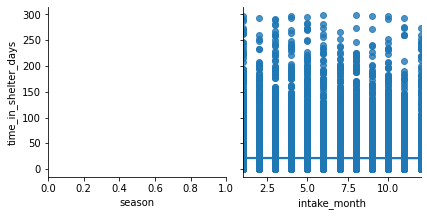

In [159]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['time_in_shelter_days'],x_vars=i, kind="reg", height=3)

In [160]:
lr_model = ols(formula='time_in_shelter_days~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12', data=df).fit()

lr_model.summary()

PatsyError: Error evaluating factor: NameError: name 'intake_month_8' is not defined
    time_in_shelter_days~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12
                                                                                                                                                                                                                                                                                                                                                                                                                                                    ^^^^^^^^^^^^^^

In [ ]:
lr_model = ols(formula='time_in_shelter_days~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12', data=df).fit()

lr_model.summary()

In [ ]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

In [ ]:
expr = """time_in_shelter~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12"""

In [ ]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results.summary())

In [ ]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)


In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['time_in_shelter']
fig = plt.figure(figsize=(25,5))
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts',color='#a8e6cf')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts',color='#ffaaa5')
plt.legend(handles=[predicted, actual])
plt.show()


In [29]:
df2=pd.read_csv('/Users/carlosruiz/Desktop/Animal-Shelter-Project/Data/shelter_breed_copy.csv')

In [30]:
df2

,Unnamed: 0,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
0,0,0,12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.74370,Austin,Dachshund Mix,0,1,NaN,32.0,9.0,15.0
1,1,1,14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.000000,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.000000,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair,0,0,NaN,6.0,8.0,16.0
2,2,2,22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.000000,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.000000,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.74370,Austin,Labrador Retriever,1,1,Beagle,57.5,19.5,14.5
3,3,3,32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.000000,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.000000,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.74370,Austin,German Shepherd Mix,0,1,NaN,90.0,26.0,13.0
4,4,4,48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.000000,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.000000,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Pointer Mix,0,1,NaN,75.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,20576,33249,79647,7 years,A769012,2011-03-29 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2018-04-01 12:36:00,4,2018,2018-04,Sunday,12,1.0,2011,3,2018-04,7 years,A769012,Dog,Chihuahua Shorthair Mix,Tan,Springdale And Govalle in Austin (TX),Normal,Stray,Spayed Female,1,2555,7.000000,"(5.0, 7.5]",2018-03-28 17:48:00,3,2018,2018-03,Wednesday,17,1.0,3 days 18:48:00.000000000,3.783333,Tan,0,NaN,1,0,1,Austin,30.271129,-97.

In [36]:
df2.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_days', 'age_upon_intake_tears',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'color1',
       'has_second_color', 'color2', 'is_dog', 'is_male', 'is_fixed',
       'found_city', 'found_lat', 'found_lon', 'region', 'breed1', 'is_bree

In [35]:
df2.drop(['Unnamed: 0','level_0','index'],axis=1,inplace=True)

In [161]:
target = df['intake_month']

In [60]:
f2=[  'age_upon_intake_tears',
       'intake_year', 'intake_hour',
       'intake_number', 'time_in_shelter_days',
       'has_second_color', 'is_dog', 'is_male', 'is_fixed', 'found_lat', 'found_lon', 'is_breed2',
       'is_mix', 'max_weight', 'max_height', 'max_life']

In [166]:
df[features].dtypes

dob_year                       int64
dob_month                      int64
age_upon_intake                int64
animal_id_intake               int64
count                          int64
age_upon_intake_days           int64
age_upon_intake_tears        float64
age_upon_intake_age_group      int64
intake_year                    int64
intake_weekday                 int64
intake_hour                    int64
intake_number                float64
time_in_shelter                int64
time_in_shelter_days         float64
has_second_color               int64
is_dog                         int64
is_male                        int64
is_fixed                       int64
found_lat                    float64
found_lon                    float64
is_breed2                      int64
is_mix                         int64
max_weight                   float64
max_height                   float64
max_life                     float64
health                         int64
color_bin                     object
w

In [163]:
df_features = df[features]

In [177]:
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (16345, 62) Target:  (16345,)
Training set - Features:  (4087, 62) Target:  (4087,)


In [178]:
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

ValueError: could not convert string to float: '1 year'

In [73]:
df2['intake_month']

0        10
1         9
2        10
3         8
4        11
         ..
20576     3
20577     3
20578     3
20579     3
20580     3
Name: intake_month, Length: 20581, dtype: int64

In [167]:
y_pred = lm.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [118]:
df.intake_month

AttributeError: 'DataFrame' object has no attribute 'intake_month'

In [176]:
for i in features:
    print(df[df[i]=='1 year'].size)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
